In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
bs=64

In [ ]:
path=untar_data(URLs.PETS) #loading cats and dogs dataset 

In [ ]:
print(path)
path.ls()

/root/.fastai/data/oxford-iiit-pet


[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
path_anno=path/'annotations'
path_img=path/'images'
print(path_anno)
print(path_img)

/root/.fastai/data/oxford-iiit-pet/annotations
/root/.fastai/data/oxford-iiit-pet/images


In [ ]:
fnames=get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_5.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_160.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_125.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_48.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_83.jpg')]

In [ ]:
type(fnames)

list

In [ ]:
type(fnames[0])

pathlib.PosixPath

In [ ]:
fnames[0]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_5.jpg')

In [ ]:
np.random.seed(2)
pat=r'/([^/]+)_\d+.jpg$'

In [ ]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

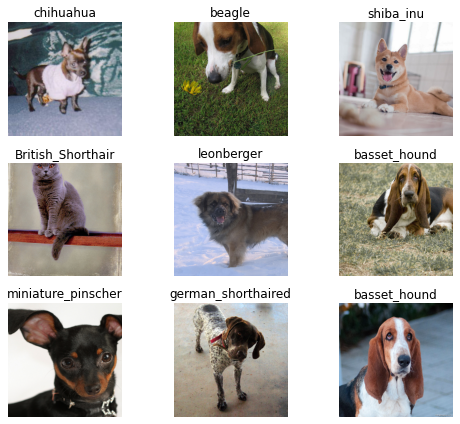

In [ ]:
data.show_batch(rows=3,figsize=(7,6))

In [ ]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


It shows we have 34 classes of dogs and cats

In [ ]:
len(data.classes)

37

Training a resnet34

In [ ]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.433577,0.376898,0.131258,01:50
1,0.602041,0.304093,0.094723,01:44
2,0.388124,0.245574,0.079161,01:46
3,0.271285,0.222640,0.075778,01:47


**My notes :**
fit_one_cycle() is fastai's implementation of Leslie SMith's "1 Cycle Policy". Smith discovered a new method of learning rate named Cyclical Learnnig Rate. Instead of using a fixed, or a decreasing learning rate, the CLR method allows learning rate to continuously oscillate between reasonable minimum and maximum bounds

I have found better results when using fit_one_cycle() over fit(). learning is very fast and error rate seems to be usually lower than using fit()

In [ ]:
learn.save('stage-1') #saving the model before I try tweaking inner layers of resnet

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

In [ ]:
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

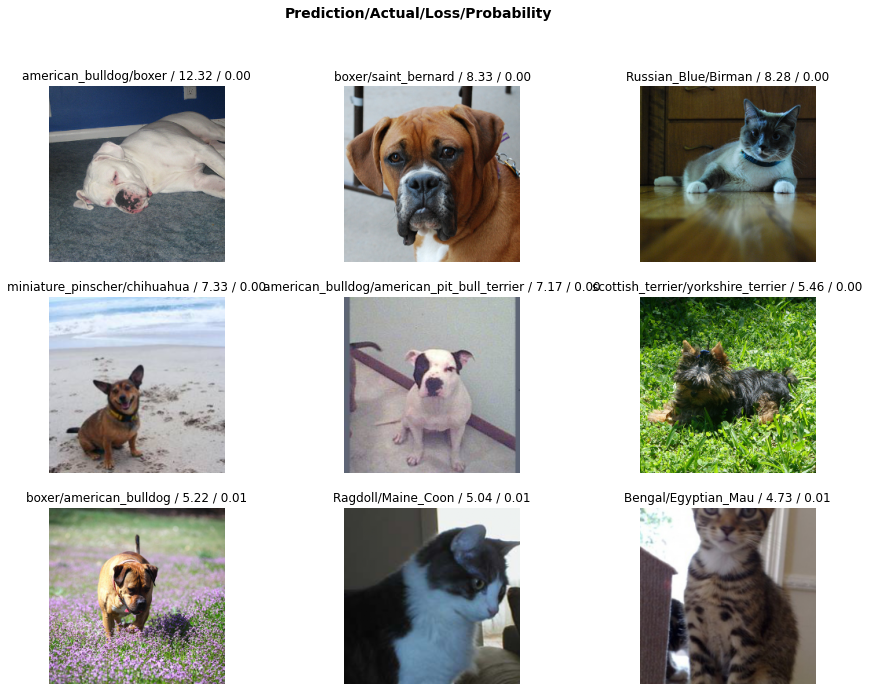

In [ ]:
interp.plot_top_losses(9,figsize=(15,11)) #shows the labels which were calsified very badly,
                                          # ie the model was very confident but still failed

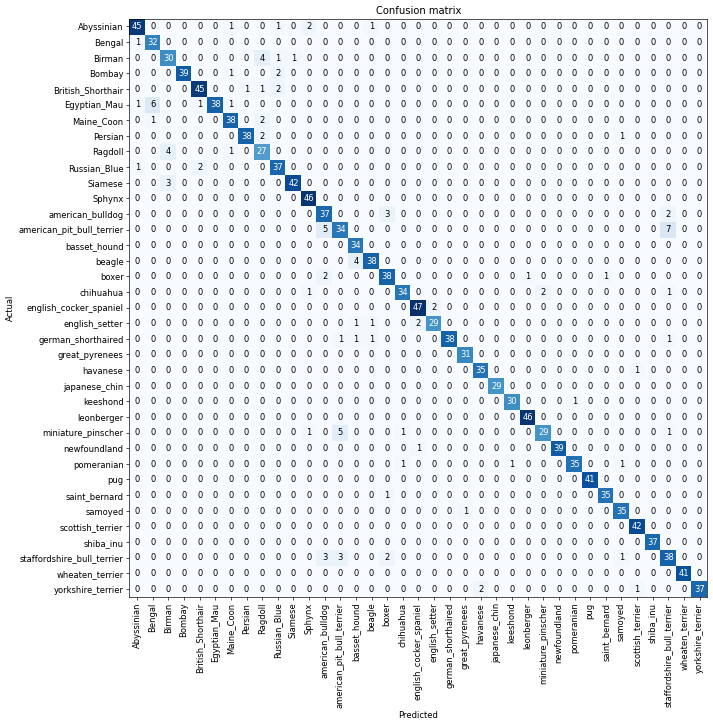

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
interp.most_confused(min_val=2) #sorts in descending order the labels tat the
                                # model was most confused about

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Egyptian_Mau', 'Bengal', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 5),
 ('miniature_pinscher', 'american_pit_bull_terrier', 5),
 ('Birman', 'Ragdoll', 4),
 ('Ragdoll', 'Birman', 4),
 ('beagle', 'basset_hound', 4),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'boxer', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Bombay', 'Russian_Blue', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('staffordshire_bull_terrier', 'boxer', 2),
 ('yorkshire_terrier', 'havanese', 2)]

**TWEAKING RESNET**

In [ ]:
learn.unfreeze()

unfreezing resnet layers

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.693222,0.367545,0.123139,01:53


so it looks like training a resnet by unfreezing layers actually increased our error compared to when we ran it by freezing above..

In [31]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
basset_hound,boxer,pomeranian,Ragdoll,Ragdoll
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leonberger,Maine_Coon,British_Shorthair,wheaten_terrier,British_Shorthair
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), 

loading the previous model which I saved before busting it up

In [33]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


finding the optimal learning rate

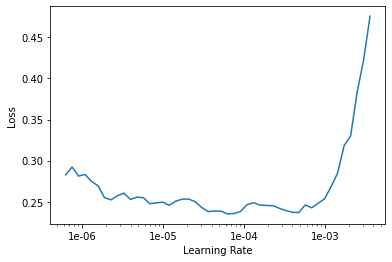

In [34]:
learn.recorder.plot()

the best LR range looks like in the range of 1e-06 and 1e-04, so lets try it next

In [36]:
learn.unfreeze() #unfreezing again because I loaded the model earlier

In [38]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.245523,0.216649,0.073748,01:53
1,0.213253,0.206143,0.066982,01:52


in just 2 epochs, the error rate was reduced to 6 wheras when running the rmodel while the layers were freezed took 4 epochs to reduce to 7 